# Pronoun Verb Pair Ratios

What this notebook hopes/tries to do:

- load all the things
- get the counts/frequencies of the verbs for *he* and *she*

> Setting a threshold of 10 results in only 16 verbs for she-verb pairs. (A consequence of how infrequently "she" occurs in men's talks. 8 yields 56. 5 yields 88. Going with 5 for now. 

- divide the larger numbers for each by the smaller numbers ... to avoid the numbers for one subcorpora packing between 0 and 1. ***Why ratios?** So we can compare the two subcorpora. (Is this a valid form of normalization?)*
- Visualize the ratios.

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATAFRAMES
# the `lem` suffix indicates the verbs have been lemmatized
svos_m = pd.read_csv("../output/svos_m_lem.csv", index_col=0)
svos_w = pd.read_csv("../output/svos_w_lem.csv", index_col=0)

# Save the SVO count for each corpus for calculating relative frequencies
m_svo_count = svos_m.shape[0]
w_svo_count = svos_w.shape[0]

# Output something to check our efforts
print(m_svo_count, w_svo_count)

80460 26610


The function below takes a dataframe, a pronoun, and a threshold and returns a two-column dataframe with the verbs and their frequency associcated with that pronoun. "Stackable" reveals that it is intended for use with multiple pronouns such that they can be compared. (The comparison could eventuallybe folded into this function or in a new follow-on function.)

In [2]:
def stackable (df, pronoun, threshold):
    # Count the verbs that follow the pronoun
    tmp = df[df["subject"] == pronoun].value_counts('verb').reset_index()
    # Re-title the columns
    tmp.rename(columns={0:'v_freq'}, inplace=True)
    # Filter out verbs below threshold
    tmp = tmp[tmp.v_freq >= threshold]
    # Rename count to indicate pronoun involved
    tmp.rename(columns={'v_freq':f'{pronoun}_freq'}, inplace=True)
    return tmp

In [3]:
m_he = stackable(svos_m, "he", 5)
m_she = stackable(svos_m, "she", 5)

verbs = m_he.merge(m_she, 'outer')
verbs.fillna(0, inplace=True)

print(verbs.shape)
print(verbs.head(verbs.shape[0]))

(88, 3)
      verb  he_freq  she_freq
0     have    232.0      94.0
1      say    132.0      47.0
2       do    111.0      41.0
3      get     90.0      24.0
4       go     78.0      34.0
..     ...      ...       ...
83     set      5.0       0.0
84    sell      5.0       0.0
85    seem      5.0       0.0
86  change      5.0       0.0
87     eat      0.0       6.0

[88 rows x 3 columns]


In [4]:
verbs["difference"] = verbs["he_freq"] - verbs["she_freq"]
verbs.head(10)

,verb,he_freq,she_freq,difference
0,have,232.0,94.0,138.0
1,say,132.0,47.0,85.0
2,do,111.0,41.0,70.0
3,get,90.0,24.0,66.0
4,go,78.0,34.0,44.0
5,take,78.0,23.0,55.0
6,want,71.0,32.0,39.0
7,make,67.0,16.0,51.0
8,tell,58.0,20.0,38.0
9,put,54.0,5.0,49.0


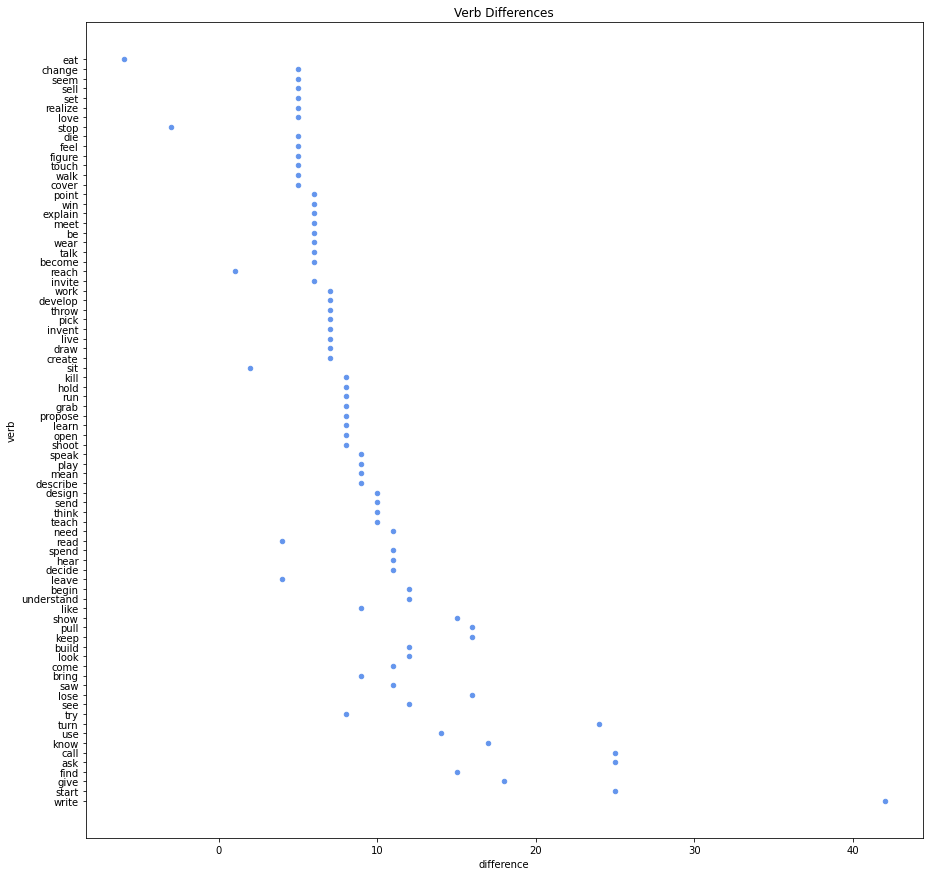

In [5]:
verbs[10:88].plot(
    x="difference",
    y="verb",
    kind='scatter',
    title="Verb Differences",
    legend=False,
    xlabel=None,
    ylabel=None,
    c='cornflowerblue',
    s=None,
    figsize = (15,15)
)
plt.show()

## Diverging Bar Chart

The code below was [copied](https://www.geeksforgeeks.org/diverging-bar-chart-using-python/) for possible use to create a diverging bar chart.

In [ ]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)
  
# Plotting the horizontal lines
plt.hlines(y=df.index, xmin=60000, xmax=df.car_sales_z,
           color=df.colors, alpha=0.4, linewidth=5)
  
# Decorations
# Setting the labels of x-axis and y-axis
plt.gca().set(ylabel='Quarter', xlabel='Sales')
  
# Setting Date to y-axis
plt.yticks(df.index, df.Date, fontsize=12)
  
# Title of Bar Chart
plt.title('Diverging Bars Chart Example', fontdict={
          'size': 20})
  
# Optional grid layout
plt.grid(linestyle='--', alpha=0.5)
  
# Displaying the Diverging Bar Chart
plt.show()